<H1> Premières classifications </H1>

Le but de ce notebook est de faire des premières classifications. Pour cela nous utilisons le jeu de données IRIS qui est très connu dans la communauté.  

Dans un premier temps, nous présentons une première classification pour apprendre à utiliser un classifieur et à prédire une valeur. Les jeux de données d'apprentissage et de de test sont présentés par la suite. Nous présentons ensuite différentes mesures pour évaluer un modèle.   
Etant donné qu'il n'est pas possible d'avoir un classifieur universel (NO FREE LUNCH THEOREM), nous verrons comment utiliser différents classifieurs et comment rechercher les meilleurs paramètres d'un classifieur. Enfin nous verrons comment sauvegarder et ré-utiliser un modèle appris.


In [1]:
#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<H2> Le jeu de données IRIS </H2>

Nous considérons par la suite le jeu de données des IRIS

In [2]:
import pandas as pd
import numpy as np
#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

df = pd.read_csv(url, names=names)
# 5 premières lignes du fichier
display(df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Toute première classification

La classification supervisée considère les données sous la forme ($X$,$Y$) où $X$ correspond aux variables prédictives et $Y$ le résultat d'une observation, i.e. la variable à prédire. 
En se basant sur un jeu d'apprentissage, un algorithme de classification supervisée cherche une fonction mathématique $F$ qui permet de transformer (au mieux) $X$ vers $Y$, i.e. $F(X) \approx Y$.  

Convention : les variables prédictives sont celles associées aux objets, généralement stockées sous la forme d'une matrice aussi, par convention, elles sont souvent notées en majuscule (notation d'une matrice). Les variables à prédire sont généralement stockées dans un vecteur et sont souvent notées avec une lettre majuscle (notation d'un vecteur).  

Autrement il est tout à fait possible d'utiliser des noms de variables significatives comme data, target.

In [3]:
array = df.values #necessité de convertir le dataframe en numpy
#X matrice - utilisation du X majuscule
X = array[:,0:4] 
#y vecteur - utilisation du y minuscule
y = array[:,4]


Dans scikit-learn, pour apprendre un modèle, un estimateur est créé en appelant sa méthode *fit(X, y)*.  
Dans l'exemple qui suit nous utilisons un classifieur naïve Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html).

In [4]:
import sklearn
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X, y) 
# la ligne affichée dans le Out indique les hyperparamètres 
#du classifieur s'ils existent

GaussianNB(priors=None, var_smoothing=1e-09)

La ligne affichée dans le Out indique les hyperparamètres du classifieur s'ils existent. 
Il est également possible de les obtenir à l'aide de :

In [5]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Il est alors possible de prédire une valeur non lue à l'aide de la méthode *predict*. Par exemple, nous savons que les valeurs du 5ième IRIS sont 5.0,	3.6,	1.4,	0.2 et qu'il appartient à la classe Iris-setosa.

In [6]:
#Prediction du résultat
result = clf.predict([[ 5.0,  3.6,  1.4,  0.2]])
print ('La prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est', 
       result)



La prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est ['Iris-setosa']


Test de la prédiction sur les données d'apprentissage. 

In [7]:
result = clf.predict(X)
print (result)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'

Une première évaluation de la qualité de la prédiction peut se faire avec le calcul de l'*accuracy* (pourcentage de prédictions correctes). 

In [8]:
from sklearn.metrics import accuracy_score


print ('accuracy: ',accuracy_score(result, y))



accuracy:  0.96


Comme nous pouvons le constater, même sur le jeu d'apprentissage il y a des erreurs dans le modèle appris.
Pour connaître les objets mal classés :

In [9]:
y = np.asarray(y)
#misclassified = np.where(y_test != clf.predict(X_test))
misclassified = np.where(y != clf.predict(X))


print('Les objets mal classés sont :')

i=0
for i in misclassified:
    #print('\n','o',i," ",df.iloc[i,:]," ",y[i])
    print('\n',df.iloc[i,:]['Species'])
    #print('\n',df.iloc[i,:]," ",y[i])
    print ('\n')

for i in misclassified: 
    print ('\n', i,'classé en ',clf.predict(X)[i],'\n')
    print ('\n')

Les objets mal classés sont :

 52     Iris-versicolor
70     Iris-versicolor
77     Iris-versicolor
106     Iris-virginica
119     Iris-virginica
133     Iris-virginica
Name: Species, dtype: object



 [ 52  70  77 106 119 133] classé en  ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor'] 





## Jeu d'apprentissage et de test 

In [10]:
import pandas as pd 
#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm',
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

df = pd.read_csv(url, names=names)

array = df.values
X = array[:,0:4] 
y = array[:,4]


En classification, il est indispensable de créer un jeu d'apprentissage sur lequel un modèle est appris et un jeu de test pour évaluer le modèle.
La fonction *train_test_split* permet de décomposer le jeu de données en 2 groupes : les données pour l'apprentissage et les données pour les tests.

Le paramètre *train_size* indique la taille du jeu d'apprentissage qui sera utilisé.  
le paramètre *random_state* spécifie un entier germe du nombre aléatoire pour le tirage. S'il n'est pas spécifié sickit learn utilise un générateur de nombre aléatoire à partir de np.random.   

Depuis la version 0.21 il est également nécessaire de préciser la taille du jeu 
de test_size. De manière classique ce nombre est égal à la différence entre la taille du jeu de données - le test_size (1-test_size). Via cette fonctionnalité sickit learn permet de faire de l'échantillonage sur le jeu d'apprentissage.   

Dans notre exemple nous prenons 30% du jeu de données comme jeu de test.




In [11]:
from sklearn.model_selection import train_test_split 

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


L'apprentissage du modèle se fait comme précédemment

In [12]:
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

De même pour la prédiction

In [13]:
from sklearn.metrics import accuracy_score

result = clf.predict(X_test)
print('\n accuracy :', accuracy_score(result, y_test),'\n')



 accuracy : 0.9428571428571428 



Le problème essentiel de cette approche est que le modèle est appris sur un seul jeu de données et qu'en fonction de la sélection les résultats peuvent être très différents.
La bonne solution consiste à utiliser la **cross validation**.
Dans notre cas, nous allons utiliser une 10-fold cross validation pour évaluer la qualité. 
Le jeu de données sera découpé en 10 partie, entrainé sur 9, testé sur 1 et cela sera répété pour toutes les combinaisons du découpage. 

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [15]:
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print('Les différentes accuracy pour les 10 évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : ',score.mean(), 
       ' standard deviation', score.std())


Les différentes accuracy pour les 10 évaluations sont : 
 [0.8        0.86666667 1.         1.         0.93333333 1.
 1.         1.         0.93333333 1.        ] 

Accuracy moyenne :  0.9533333333333334  standard deviation 0.06699917080747259


L'écart type (standard deviation) est très important car il montre les grandes variations qui peuvent exister par rapport aux jeux de données.

Il est également possible d'utiliser le **LeaveOneOut** (ou LOO) qui est une simple validation croisée. Chaque ensemble d'apprentissage est créé en prenant tous les échantillons sauf un, l'ensemble de test étant l'échantillon laissé de côté. Ainsi, pour les échantillons, nous avons différents ensembles d'apprentissages et différents ensembles de tests. Il est cependant préférable d'utiliser la **cross validation** qui offre de meilleurs résultats.

In [16]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=loo, scoring=scoring)
print('Les différentes accuracy en leaveoneout sont : \n',
      score,'\n')
print ('Accuracy moyenne : ',score.mean(), 
       ' standard deviation', score.std())


Les différentes accuracy en leaveoneout sont : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] 

Accuracy moyenne :  0.9533333333333334  standard deviation 0.21092389359408498


## Plus loin sur l'évaluation d'un modèle 

L'accuracy (nombre d'objets correctement classés) est la métrique la plus simple pour comprendre le 
résultat de la classification mais ne tient pas du tout compte de la distribution des données et ne permet pas d'indiquer les erreurs. Par exemple avec des classes très déséquilibrées (1 vs 99), nous pouvons avoir un modèle avec une accuracy de 99% mais lorsque qu'un objet de la classe intervient nous ne pouvons pas le retrouver.  

Par la suite, par simplification, nous reprenons une classification réalisée sans cross validation mais le principe est évidemment le même avec cross validation. Nous introduisons la matrice de correlation et les différentes mesures : precision, rappel et F1-score.

In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)
array = df.values
X = array[:,0:4] 
y = array[:,4]

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print('\n accuracy:',accuracy_score(result, y_test),'\n')


 accuracy: 0.9428571428571428 



La matrice de confusion permet de connaître les objets bien ou mal classés. Il suffit d'utiliser la fonction *confusion_matrix*.

In [17]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)



 matrice de confusion 
 [[34  0  0]
 [ 0 33  5]
 [ 0  1 32]]


Il est possible d'obtenir plus d'information : *precision*, *recall* et  *f1-measure* à l'aide de *classification_report*.

In [18]:
from sklearn.metrics import classification_report
conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))


 matrice de confusion 
 [[34  0  0]
 [ 0 33  5]
 [ 0  1 32]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.97      0.87      0.92        38
 Iris-virginica       0.86      0.97      0.91        33

      micro avg       0.94      0.94      0.94       105
      macro avg       0.95      0.95      0.94       105
   weighted avg       0.95      0.94      0.94       105



**Rappel** :  
Considérons une matrice de confusion dans un cas binaire. Par exemple présence de SPAM ou non dans des mails.   

  $$  \begin{array}{|c|c|c|}
  \hline
  N= & {\bf PREDIT} & {\bf PREDIT}  \\
  115& {\bf NON} & {\bf OUI} \\
  \hline
  {\bf REEL} & 60 & 10 \\
  {\bf NON} & & \\
  \hline
 {\bf REEL} & 5 & 40 \\
  {\bf OUI} & & \\
  \hline
\end{array}$$

La matrice nous permet de voir qu'il y a deux classes prédites (OUI ou NON). Le classifieur fait un total de 115 prédictions. Sur ces 115 cas, le classifieur a prédit  OUI 50 fois et NON 65 fois. En fait 45 documents sont des SPAMS et 70 ne le sont pas. 


**TP** (True positive) : il s'agit des objets qui étaient prédits OUI (il s'agit de SPAM) et qui sont effectivement des SPAM.  
**TN** (True negative) : il s'agit des objets qui étaient prédits NON (il ne s'agit pas de SPAM) et qui effectivement ne sont pas des SPAM.  
**FP** (False positive) : il s'agit des objets qui étaient prédits comme SPAM mais qui en fait n'étaient pas des SPAM.  
**FN** (False negative) : il s'agit des objets qui étaient prédits comme non SPAM qui en fait s'avèrent être des SPAM.  
Dans la matrice ci-dessous ces éléments sont reportés :  

$$  \begin{array}{|c|c|c|c|}
  \hline
  N= & {\bf PREDIT} & {\bf PREDIT} & \\
  115& {\bf NON} & {\bf OUI} & \\
  \hline
  {\bf REEL} & TN=60 & FP=10 & 70\\
  {\bf NON} & & \\
  \hline
 {\bf REEL} & FN=5 & TP=40 & 45\\
  {\bf OUI} & & \\
  \hline
  & 65 & 50 &\\
  \hline
\end{array}$$

L'**accuracy**  (ou justesse) correspond au pourcentage de prédiction correcte. Elle est définie par 
$$\frac{TP+TN}{TN+FP+FN+TP}=\frac{40+60}{60+10+5+40}=0.86.$$  
Le **recall** (ou sensitivity ou True Positive Rate ou rappel) correspond au nombre d' objets pertinents retrouvés par rapport aux nombres d'objets pertinents du jeu de données. Dans notre cas, pour tous les OUI présents combien de fois le OUI a t'il été prédit ?

$$recall=\frac{Nombre\ de\ SPAM\ correctement\ reconnus}{Nombre\ total\ de\ SPAM\ dans\ le\ jeu\ de\ données} = \frac{TP}{FN+TP}=\frac{40}{40+5}=0.88.$$  
La **precision** correspond à la proportion d'objets pertinents parmi les objets sélectionné. Tous les objets retournés non pertinents constituent du bruit. 
$$precision=\frac{Nombre\ de\ SPAM\ correctement\ reconnus}{Nombre\ de\ fois\ où\ un\ objet\ a\ été\ prédit\ SPAM} = \frac{TP}{TP+FP}=\frac{40}{40+10}=0.8.$$  

Le **f1-score** (ou f-measure) est la moyenne harmonique du rappel et de la précision.
$$f1-score=2\times\frac{precision \times recall}{precision + recall}=2\times\frac{0.8 \times 0.88}{0.8+0.88}.$$  

Dans le cas d'une classification multiclasse, à partir de la matrice de confusion, la precision est calculée, pour une colonne $i$, par :  
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}$$
et le recall par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}$$  

Pour la matrice de confusion suivante : 
\begin{array}{cccc}
Iris-setosa &34 & 0 & 0\\
Iris-versicolor & 0 &33 & 5\\
Iris-virginica & 0 & 1 &32\\
\end{array}

classification_report retourne le résultat suivant :  

 \begin{array}{ccccc}
           &   precision  &  recall & f1-score &  support\\
\\
    Iris-setosa    &   1.00  &    1.00  &    1.00   &     34\\
Iris-versicolor   &    0.97 &     0.87  &    0.92  &      38\\
 Iris-virginica   &    0.86  &    0.97  &    0.91  &      33\\
\\
    avg / total    &   0.95  &    0.94  &    0.94   &    105\\
\end{array}    

La precision d'Iris-versicolor est obtenue par : 
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}=\frac{33}{33+1}=0.97.$$
Le rappel d'Iris-versicolor est obtenue par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}=\frac{33}{33+5}=0.87.$$
La precision d'Iris-virginica est obtenue par : 
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}=\frac{32}{32+5}=0.86.$$
Le rappel d'Iris-versicolor est obtenue par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}=\frac{32}{32+1}=0.96.$$

**Le cas particulier de la classification binaire **  

Dans le cas de la classification binaire, il est également possible d'utiliser la courbre ROC (*Receiver operating characteristic*). Il s'agit d'un graphique qui représente les performances d'un modèle de classification (tracé des vrais positifs en fonction du taux de faux positifs).  

Le taux de vrais positifs correspond au rappel (*recall*) : 
$$TTP = \frac{TP}{FN+TP}$$  
Le taux de faux positifs correspond à :  
$$TFP = \frac{FP}{FP+TP}$$
est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

Taux de vrais positifs
Taux de faux positifs
Le taux de vrais positifs (TVP) est l'équivalent du rappel.

Area under the ROC curve : 0.797101


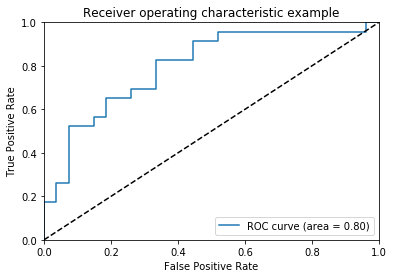

In [20]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

Pour connaître les objets mal classés :

In [19]:
misclassified = np.where(y != clf.predict(X))

print('Les objets mal classés sont :')

i=0
for i in misclassified:
    print('\n',df.iloc[i,:]['Species'])
    print ('\n')

for i in misclassified: 
    print ('\n', i,'classé en ',clf.predict(X)[i],'\n')
    

Les objets mal classés sont :

 52     Iris-versicolor
56     Iris-versicolor
70     Iris-versicolor
77     Iris-versicolor
83     Iris-versicolor
106     Iris-virginica
119     Iris-virginica
Name: Species, dtype: object



 [ 52  56  70  77  83 106 119] classé en  ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'] 



Pour afficher, avec seaborn, la matrice de confusion.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(conf, 
                 ax=ax,           # Axes où afficher
                 xticklabels=labels, #labels sur les x
                 yticklabels=labels, #labels sur les colonnes
                 cmap="YlGnBu", # Couleur
                 square=True,    # Si True, toutes les cellules 
                                 #ont le même aspect carré
                 annot=True      # Pour afficher les valeurs
                )
fig.suptitle('GaussianNB\nAccuracy:{0:.3f}'.format(accuracy_score(result,y_test)), 
              fontsize=12, 
              fontweight='bold')
plt.show()

<Figure size 1000x600 with 2 Axes>

Les métriques peuvent être appelées indépendamment. Par exemple   
*from sklearn.metrics import precision_score  
print("Precision score: {}".format(precision_score(y_true,y_pred)))*   
ou à l'aide de la fonction *precision_recall_fscore_support*

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, result)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.97058824 0.86486486]
recall: [1.         0.86842105 0.96969697]
fscore: [1.         0.91666667 0.91428571]
support: [34 38 33]


## Utiliser plusieurs classifiers

Comme l'indique le NO FREE LUNCH THEOREM il n'existe pas un classifieur universel et en fonction des données il est souvent nécessaire d'en évaluer plusieurs pour retenir le plus efficace. Le principe est similaire au précédent, il suffit de les mettre dans une structure et de boucler dessus.

In [22]:
#preparation des données
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)
array = df.values
X = array[:,0:4] 
y = array[:,4]

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=validation_size, random_state=seed,test_size=testsize)


Dans l'exemple, nous utilison LogisticRegression, DecisionTree, KNeighbors, GaussianNB et SVM.   
Les paramètres utilisés pour chacune des approches sont ceux par défaut. 
Pour chaque approche nous faisons une cross validation de 10.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
    #print (model.get_params())
    print ("Time pour",name," ",time.time() - start_time)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)       

Time pour LR   0.1513993740081787
LR: 0.900000 (0.116428)
Time pour KNN   0.01901412010192871
KNN: 0.933333 (0.084327)
Time pour CART   0.01136636734008789
CART: 0.946667 (0.065320)
Time pour NB   0.018451929092407227
NB: 0.946667 (0.058119)
Time pour SVM   0.012649774551391602
SVM: 0.953333 (0.052068)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

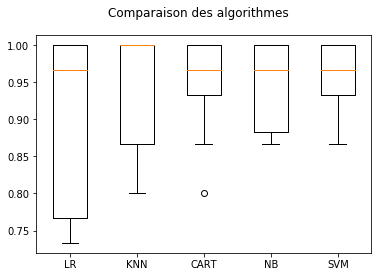

In [25]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Comme SVM donne des meilleurs résultats, nous pouvons l'utiliser comme modèle de prédiction.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))


 accuracy:  0.9619047619047619 


 matrice de confusion 
 [[34  0  0]
 [ 0 34  4]
 [ 0  0 33]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      0.89      0.94        38
 Iris-virginica       0.89      1.00      0.94        33

      micro avg       0.96      0.96      0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.97      0.96      0.96       105



## Les hyperparamètres


Dans l'approche précédente nous avons pris les valeurs par défaut pour les différents classifieurs. Cependant en fonction des paramètres du classifieur les résultats peuvent être complétement différents (choix du noyeau SVM, nombre de K dans KNeighbors, etc. ). Sikit learn permet de pouvoir faire une recherche exhaustive (grid search) pour trouver les paramètres les plus pertinents pour un classifieur.

In [27]:
#preparation des données
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)
array = df.values
X = array[:,0:4] 
y = array[:,4]

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=validation_size, 
                                                    random_state=seed,
                                                    test_size=testsize)



Considérons un arbre de décision. Les principaux paramètres sont le critère pour découper (gini ou entropy), la profondeur maximale de l'arbre, et le nombre d'échantillons par feuille. Il faut, dans un premier temps, initialiser les variables à tester dans un dictionnaire.  
Le test de toutes les valeurs se fait à l'aide de la fonction *GridSearchCV*.
Ele prend commme paramètre le classifieur, le dictionnaire ds paramètre, le type de scoring, le nombre de crossvalidation.  

Quelques paramètres souvent utilisés :  
-  *n_jobs* : (par défaut 1) nombre de coeurs à utiliser pour effectuer les calculs, dépend du cpu. Si la machine possède plusieurs coeurs, il est possible d'indiquer de tous les utiliser en mettant *n_jobs=-1*  
-  *verbose* : affichage du déroulement des calculs, 0 = silent.
- *random_state* : si le classifieur utilisé utilise de l'aléatoire, random_state permet de fixer le générateur pour reproduire les résultats.   


Un grid search est long à obtenir dans la mesure où il faut essayer l'ensemble des cas. La possibilité de répartir sur plusieurs processeur permet de faire gagner beaucoup de temps. 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_param = {  
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}


gd_sr = GridSearchCV(estimator=DecisionTreeClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    iid=True,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Pour connaître les meilleures conditions : 

In [29]:
print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score  0.9777777777777777 

meilleurs paramètres {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1} 

meilleur estimateur DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 



Avec KNeighborsClassifier()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
grid_param = {  
    'n_neighbors': list(range(1,15)),
    'metric': ['minkowski','euclidean','manhattan']
}
                        
gd_sr = GridSearchCV(estimator=KNeighborsClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    iid=True,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


meilleur score  1.0 

meilleurs paramètres {'metric': 'minkowski', 'n_neighbors': 1} 

meilleur estimateur KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform') 



Avec SVM 

In [31]:
from sklearn.svm import SVC
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_sr = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


meilleur score  1.0 

meilleurs paramètres {'C': 1, 'gamma': 0.001, 'kernel': 'linear'} 

meilleur estimateur SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 



Pour voir l'ensemble des évaluations effectuées par GridSearchCV : 

In [32]:

# convertion en DataFrame
results = pd.DataFrame(gd_sr.cv_results_) 
# Affichage des 5 premières lignes
display(results.head())


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000950,0.000479,0.444444,0.452069,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",26,0.363636,...,0.375,0.378378,0.375,0.378378,0.375,0.378378,0.000347,0.000152,0.136679,0.145402
1,0.000517,0.000292,0.444444,0.452069,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",26,0.363636,...,0.375,0.378378,0.375,0.378378,0.375,0.378378,0.000163,0.000024,0.136679,0.145402
2,0.000436,0.000277,0.444444,0.452069,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",26,0.363636,...,0.375,0.378378,0.375,0.378378,0.375,0.378378,0.000064,0.000014,0.136679,0.145402
3,0.000468,0.000308,0.444444,0.452069,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",26,0.363636,...,0.375,0.378378,0.375,0.378378,0.375,0.378378,0.000113,0.000052,0.136679,0.145402
4,0.000377,0.000345,0.444444,0.452069,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",26,0.363636,...,0.375,0.378378,0.375,0.378378,0.375,0.378378,0.000019,0.000112,0.136679,0.145402


L'avantage de GridSearchCV est qu'il va parcourir toutes les conditions et retourner celles qui sont les meilleures pour la ou les mesures de scoring recherchée (dans notre cas nous avons privilégié l'accuracy).
Cela est très pratique mais est malheureusement impossible dans certains cas car beaucoup trop long à mettre en place.
Une solution possible est d'utiliser *RandomizedSearchCV* qui parcourt de manière aléatoire l'espace de recherche. 
Il suffit dans ce cas de spécifier des tirages aléatoires pour les valeurs possibles des paramètres et de préciser le nombre d'itérations voulues.
Le second usage de *RandomizedSearchCV* est, lorsque l'on n'a pas une très bonne idée de ce que cela peut donner ou des paramètres à utiliser de faire appel à lui pour avoir des valeurs qui peuvent être significatives et de faire suivre à partir de ces valeurs une recherche via *GridSearchCV*.




In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rand_param = {  
    'max_depth': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20)
}


rand_sr = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                             param_distributions = rand_param, 
                             random_state=1, 
                             n_iter=20, 
                             cv=3, 
                             n_jobs=-1,
                             scoring='accuracy',
                             iid=True,
                             return_train_score=True)

rand_sr.fit(X_train, y_train)  

print ('meilleur score ',rand_sr.best_score_,'\n')
print ('meilleurs paramètres', rand_sr.best_params_,'\n')
print ('meilleur estimateur',rand_sr.best_estimator_,'\n')

# convertion en DataFrame
results = pd.DataFrame(rand_sr.cv_results_) 
# Affichage des 5 premières lignes
display(results.head())



meilleur score  0.9555555555555556 

meilleurs paramètres {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1} 

meilleur estimateur DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 



,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000518,0.000348,0.733333,0.733136,entropy,12,13,"{'criterion': 'entropy', 'max_depth': 12, 'min...",9,0.7500,0.724138,0.733333,0.733333,0.714286,0.741935,0.000051,0.000074,0.014548,0.007267
1,0.000512,0.000590,0.733333,0.733136,gini,10,12,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",9,0.7500,0.724138,0.733333,0.733333,0.714286,0.741935,0.000065,0.000243,0.014548,0.007267
2,0.000421,0.000315,0.955556,1.000000,entropy,16,1,"{'criterion': 'entropy', 'max_depth': 16, 'min...",1,0.9375,1.000000,0.933333,1.000000,1.000000,1.000000,0.000056,0.000025,0.029918,0.000000
3,0.000503,0.000392,0.733333,0.733136,gini,2,13,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",9,0.7500,0.724138,0.733333,0.733333,0.714286,0.741935,0.000145,0.000063,0.014548,0.007267
4,0.000288,0.000228,0.955556,1.000000,entropy,14,7,"{'criterion': 'entropy', 'max_depth': 14, 'min...",1,0.9375,1.000000,0.933333,1.000000,1.000000,1.000000,0.000023,0.000011,0.029918,0.000000


## Gridsearch et plusieurs classifieurs

Il est tout à fait possible d'utiliser Gridsearch avec plusieurs classifieurs. Il suffit pour cela d'initaliser les classifiers dans un biblitothèse et faire de même pour les paramètres.

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC()
}

params = {'KNeighborsClassifier' : [{'n_neighbors': list(range(1,15))},
    {'metric': ['minkowski','euclidean','manhattan']}],
           'DecisionTreeClassifier': [{'max_depth': [1,2,3,4,5,6,7,8,9,10]},
    {'criterion': ['gini', 'entropy']},
    {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}],
       'SVC':[{'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}]  }



In [35]:
class Result:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))

       
results = []
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True)
    gd_sr.fit(X_train, y_train)  
    result=Result(key,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)   
    
    
    
results=sorted(results, key=lambda result: result.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.2f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.2f' %result.score, 
           ' avec ',result.parameters,'\n')
    


Le meilleur resultat : 

Classifier :  KNeighborsClassifier  score 1.00  avec  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform') 

Tous les résultats : 

Classifier :  KNeighborsClassifier  score 1.00  avec  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform') 

Classifier :  SVC  score 1.00  avec  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Classifier :  DecisionTreeClassifier  score 0.98  avec  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non

## Les pipelines 

Il peut arriver que différentes combinaisons de pré-traitements puissent être utilisées. Par exemple il est possible d'utiliser du changement d'échelle, du PCA (projection sur un nombre différent de dimensions), de faire du remplacement de valeurs manquantes ...  

L'objectif du pipeline est de pouvoir regrouper l'ensemble de ces prétraitements et de pouvoir les faire suivre par le classifier.
Le principe consiste à d'abord mettre la chaîne de pré-traitement, d'ensuite mettre le classifier et d'utiliser directement le pipeline.

** Attention ** les pipelines sont très importants lorsque l'on sauvegarde un modèle. En effet comme ils prennent en compte les pré-traitements tout est sauvegardé. Cela veut dire que dans le cas de nouvelles données à évaluer avec un modèle lors de la prédiction les données seront automatiquement transformées. (Voir partie utiliser de nouvelles données plus bas).

L'exemple suivant illustre un pipeline où un standard scaling est réalisé puis un PCA et enfin un DecisionTree est appliqué.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)

#transformation de Species en float pour StantardScaler
class_label_encoder = LabelEncoder()
df['Species']=class_label_encoder.fit_transform(df['Species'].values)


array = df.values
X = array[:,0:4] 
y = array[:,4]


print ('Création du pipeline \n')
pipeline = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', DecisionTreeClassifier(random_state=42))])

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)

print('\n accuracy:',accuracy_score(result, y_test),'\n')


Création du pipeline 


 accuracy: 0.9142857142857143 



Il est possible d'utiliser GridSearch pour chercher les meilleures valeurs dans un pré-traitement.

In [37]:
from sklearn.model_selection import GridSearchCV
print ('Création du pipeline \n')
pipeline = Pipeline([('pca', PCA()),
                    ('clf', DecisionTreeClassifier(random_state=42))])

grid_param = {
    'pca__n_components': [2,3]
}


gd_sr = GridSearchCV(pipeline,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

Création du pipeline 

meilleur score  0.9555555555555556 

meilleurs paramètres {'pca__n_components': 2} 

meilleur estimateur Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 



Ou bien de faire les deux en même temps. 

In [38]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)

#transformation de Species en float pour StantardScaler
class_label_encoder = LabelEncoder()
df['Species']=class_label_encoder.fit_transform(df['Species'].values)


array = df.values
X = array[:,0:4] 
y = array[:,4]

pipeline = Pipeline([('pca', PCA()),
                    ('clf', DecisionTreeClassifier())])



grid_param = [{'pca__n_components': [2,3]},
                {'clf': [DecisionTreeClassifier()],
                 'clf__max_depth': [1,2,3,4,5,6,7,8,9,10],
                 'clf__criterion': ['gini', 'entropy'],
                 'clf__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
                }]



gd_sr = GridSearchCV(estimator=pipeline,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    iid=True,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  
print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score  0.9555555555555556 

meilleurs paramètres {'pca__n_components': 2} 

meilleur estimateur Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]) 



## Sauvegarder le modèle appris 

Une fois un modèle appris il est possible de le sauvegarder pour pouvoir lui appliquer d'autres données à prédire. Deux librairies existent : **pickle** et **joblib**.    
Pickle est la librairie Python standard pour sérialiser-désérialiser des objets. standard Python tool for object (de)serialization. Joblib propose également de sérialiser-désérialiser des objets lorsque ceux-ci sont très volumineux.   
Le choix des deux dépend des usages.  

In [39]:
#preparation des données
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, names=names)
array = df.values
X = array[:,0:4] 
y = array[:,4]

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

**pickle**

Pour sérialiser et sauvegarder le modèle appris :

In [40]:
import pickle
filename = 'pkl_modelNB.sav'
pickle.dump(clf, open(filename, 'wb'))

Pour utiliser le modèle sauvegardé : 

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_loaded = pickle.load(open(filename, 'rb'))
print ('Modèle chargé',clf_loaded,'\n')
result = clf_loaded.predict(X_test)

print('\n accuracy:\n')
print (accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))

result = clf_loaded.predict([[ 5.0,  3.6,  1.4,  0.2]])
print ('\nLa prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est', 
       result)

Modèle chargé GaussianNB(priors=None, var_smoothing=1e-09) 


 accuracy:

0.9428571428571428 


 matrice de confusion 
 [[34  0  0]
 [ 0 33  5]
 [ 0  1 32]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.97      0.87      0.92        38
 Iris-virginica       0.86      0.97      0.91        33

      micro avg       0.94      0.94      0.94       105
      macro avg       0.95      0.95      0.94       105
   weighted avg       0.95      0.94      0.94       105


La prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est ['Iris-setosa']


**joblib**

Pour sérialiser et sauvegarder le modèle appris :

In [42]:
from sklearn.externals import joblib
filename = 'job_modelNB.sav'
joblib.dump(clf, filename)

['job_modelNB.sav']

Pour utiliser le modèle sauvegardé :

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_loaded = joblib.load(filename)
print (clf_loaded)
#result = clf_loaded.score(X_test, y_test)
#print(result)

result = clf_loaded.predict(X_test)

print('\n accuracy:\n')
print (accuracy_score(result, y_test),'\n')



GaussianNB(priors=None, var_smoothing=1e-09)

 accuracy:

0.9428571428571428 



## Utiliser de nouvelles données 

A partir d'un modèle sauvegardé, il est donc possible d'appliquer la fonction predict pour connaître la prédiction du modèle.   

Dans le cas de nouvelles données il faut faire attention car des pré-traitements ont sans doute été effectués avec les données initiales (changement d'échelle, normalisation, etc) et une matrice a été obtenue pour apprendre un modèle.   

Il est impératif que les nouvelles données suivent le même traitement. Nous présentons par la suite un exemple d'utilisation à l'aide des données IRIS. Cette fois-ci nous utilisons iris qui est disponible directement dans scikit learn.

In [44]:
from sklearn import svm
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import pickle
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from time import time
from sklearn.metrics import classification_report



Lecture de la base iris et utilisation de SVM comme classifieur

In [45]:
clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()


Dans un premier temps nous ajoutons du bruit dans la base iris en mettant pour trois colonnes des valeurs supérieures à 1000. L'objectif ici est de montrer que les valeurs sont trop différentes pour obtenir de bons résultats de classification. Nous avons vu (Ingénierie des données) que SVM était très sensible à la standardisation.

In [46]:
for i in range (len(iris.data)):
    for j in range (0,2):
        val = iris.data[i][j]
        value = val*1000
        iris.data[i][j]=value

Définition de X et de y

In [47]:
X = iris.data
y = iris.target

In [48]:
validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

Fonction de comptage pour voir combien d'instances sont mal classés après la classification.

In [49]:
def cpt_mal_classes(y_test,result):
    nb=0
    for i in range(len(y_test)):
        if y_test[i] != result [i]:
            nb=nb+1
    return nb       

def print_nb_classes (taille,nb):
    print ("Taille des données",
       taille, 
       " mal classés",nb)    

Première classification avec SVM. L'objectif ici est de montrer que SVM est très sensible à la standardisation. Il suffit de regarder l'accuracy pour s'en convaincre.

In [50]:
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

result = clf.predict(X_test)
nb=cpt_mal_classes(y_test,result)
taille=len(y_test)
print_nb_classes (len(y_test),nb)
print('\n accuracy :', accuracy_score(result, y_test),'\n')


Taille des données 105  mal classés 46

 accuracy : 0.5619047619047619 



Par la suite nous allons donc utiliser MinMaxScaler () pour standardiser les données.   

Nous sauvegardons également le jeu de test (X_save=X_test.copy()). L'objectif est de sauvegarder le modèle pour évaluer en le rechargeant si le nombre d'instances bien classées est le même que celui qui a été prédit lors de l'apprentissage. 

In [51]:
validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

Standadisation des données et sauvegarde du jeu de test avant le passage par la standardisation. La standardisation a été faite car les valeurs du jeu de données ne permettait pas de pouvoir utiliser le classifieur directement. En sauvegardant le jeu avant la standardisation nous simulons le fait que nous arrivons avec un nouveau jeu de données d'iris.

In [52]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_save=X_test.copy()
X_test = scaler.fit_transform(X_test)

In [53]:
clf.fit(X_train, y_train)

result = clf.predict(X_test)
nb=cpt_mal_classes(y_test,result)
taille=len(y_test)
print_nb_classes (len(y_test),nb)
print('\n accuracy :', accuracy_score(result, y_test),'\n')

Taille des données 105  mal classés 5

 accuracy : 0.9523809523809523 



Sauvegarde du modèle appris

In [54]:
print("\nSauvegarde du modèle") 
filename = 'firstmodel.pkl'
pickle.dump(clf, open(filename, 'wb'))




Sauvegarde du modèle


Ouverture du modèle pour le tester. Ici nous reprenons le jeu de test qui n'a pas eu l'étape de standardisation comme nouvelles données, i.e. nous avons de nouveaux IRIS. Si le modèle est bien appris le nombre d'objets mal classés devrait être le même.

In [55]:
print ("Chargement du modèle \n")
filename = 'firstmodel.pkl'
clf_loaded = pickle.load(open(filename, 'rb'))

result=clf_loaded.predict(X_save)

nb=cpt_mal_classes(y_test,result)
taille=len(y_test)
print_nb_classes (len(y_test),nb)

Chargement du modèle 

Taille des données 105  mal classés 72


Nous pouvons constater qu'il y a plus d'objets mal classés. Comme nous avons fait une standardisation dans les étapes précédentes celle là n'a pas pu être faite pour les nouvelles données. La standardisation doit donc être faite pour les nouvelles données mais elle nécessite de pouvoir récupérer les anciennes valeurs pour tout standardiser.   

Les pipelines sont donc utiles
pour pouvoir tout sauvegarder (l'étape de standardisation et l'application du modèle). 

In [56]:
pipeline = Pipeline([('vect', preprocessing.MinMaxScaler()),
                ('clf', svm.SVC(gamma='scale')),
               ])




X=iris.data
y=iris.target


X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

X_save=X_test.copy()

pipeline.fit(X_train, y_train)

result = pipeline.predict(X_test)

nb=cpt_mal_classes(y_test,result)
taille=len(y_test)
print_nb_classes (len(y_test),nb)
print('\n accuracy:',accuracy_score(result, y_test),'\n')


print("\nSauvegarde du pipeline ") 
filename = 'avecscaler.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

Taille des données 105  mal classés 5

 accuracy: 0.9523809523809523 


Sauvegarde du pipeline 


In [57]:
print ("Chargement du modèle \n")
filename = 'avecscaler.pkl'
clf_loaded = pickle.load(open(filename, 'rb'))

result=clf_loaded.predict(X_save)
nb=cpt_mal_classes(y_test,result)
taille=len(y_test)
print_nb_classes (len(y_test),nb)



Chargement du modèle 

Taille des données 105  mal classés 5


In [ ]:
**